In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [66]:
train = pd.read_csv('/Users/macfan/Downloads/sf-crime/train.csv')
print(train.shape)
from sklearn.model_selection import train_test_split
test, train = train_test_split(train, test_size=0.125)

(878049, 9)


In [67]:
print(train.shape)
train.head(6)

(109757, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
343506,2010-08-11 19:30:00,ROBBERY,ROBBERY OF A COMMERCIAL ESTABLISHMENT WITH A GUN,Wednesday,TARAVAL,NONE,2400 Block of TARAVAL ST,-122.492317,37.742374
794484,2004-02-18 11:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,TENDERLOIN,NONE,500 Block of OFARRELL ST,-122.413820,37.785738
294809,2011-05-02 12:00:00,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Monday,TARAVAL,EXCEPTIONAL CLEARANCE,3800 Block of NORIEGA ST,-122.504884,37.753042
400837,2009-09-20 16:38:00,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,SOUTHERN,"ARREST, CITED",700 Block of MARKET ST,-122.405359,37.785977
353458,2010-06-17 08:00:00,NON-CRIMINAL,LOST PROPERTY,Thursday,TENDERLOIN,NONE,500 Block of JONES ST,-122.413136,37.786260
732810,2004-12-20 21:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Monday,BAYVIEW,NONE,THOMAS AV / SILVER AV,-122.400357,37.735581


In [83]:
mapping = train
for index, row in mapping.iterrows():
    if(row['Y']>40):
        mapping.drop(index,inplace=True)

['ROBBERY' 'VEHICLE THEFT' 'LARCENY/THEFT' ... 'DRUG/NARCOTIC' 'ASSAULT'
 'ASSAULT']
                  color          xs         ys
0               ROBBERY -122.492317  37.742374
1         VEHICLE THEFT -122.413820  37.785738
2         LARCENY/THEFT -122.504884  37.753042
3         LARCENY/THEFT -122.405359  37.785977
4          NON-CRIMINAL -122.413136  37.786260
5         VEHICLE THEFT -122.400357  37.735581
6         DRUG/NARCOTIC -122.376642  37.732500
7       SECONDARY CODES -122.425011  37.730878
8           DRUNKENNESS -122.403405  37.775421
9              TRESPASS -122.411778  37.783981
10       MISSING PERSON -122.444432  37.774635
11            VANDALISM -122.419706  37.753771
12         NON-CRIMINAL -122.409792  37.798508
13                FRAUD -122.463764  37.781175
14            VANDALISM -122.444010  37.760058
15         NON-CRIMINAL -122.420327  37.788452
16         NON-CRIMINAL -122.397576  37.789762
17       OTHER OFFENSES -122.409197  37.722836
18        DRUG/NARCOTI

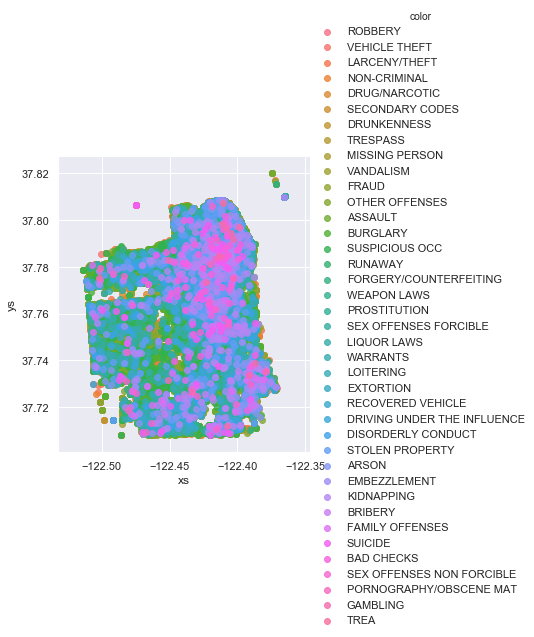

In [86]:
import seaborn as sns
xs = mapping['X'].values
ys = mapping['Y'].values
color = mapping['Category'].values
df = pd.DataFrame(dict(xs=xs, ys=ys, color=color))
sns.lmplot('xs', 'ys', data=df, hue='color', fit_reg=False)
plt.show()

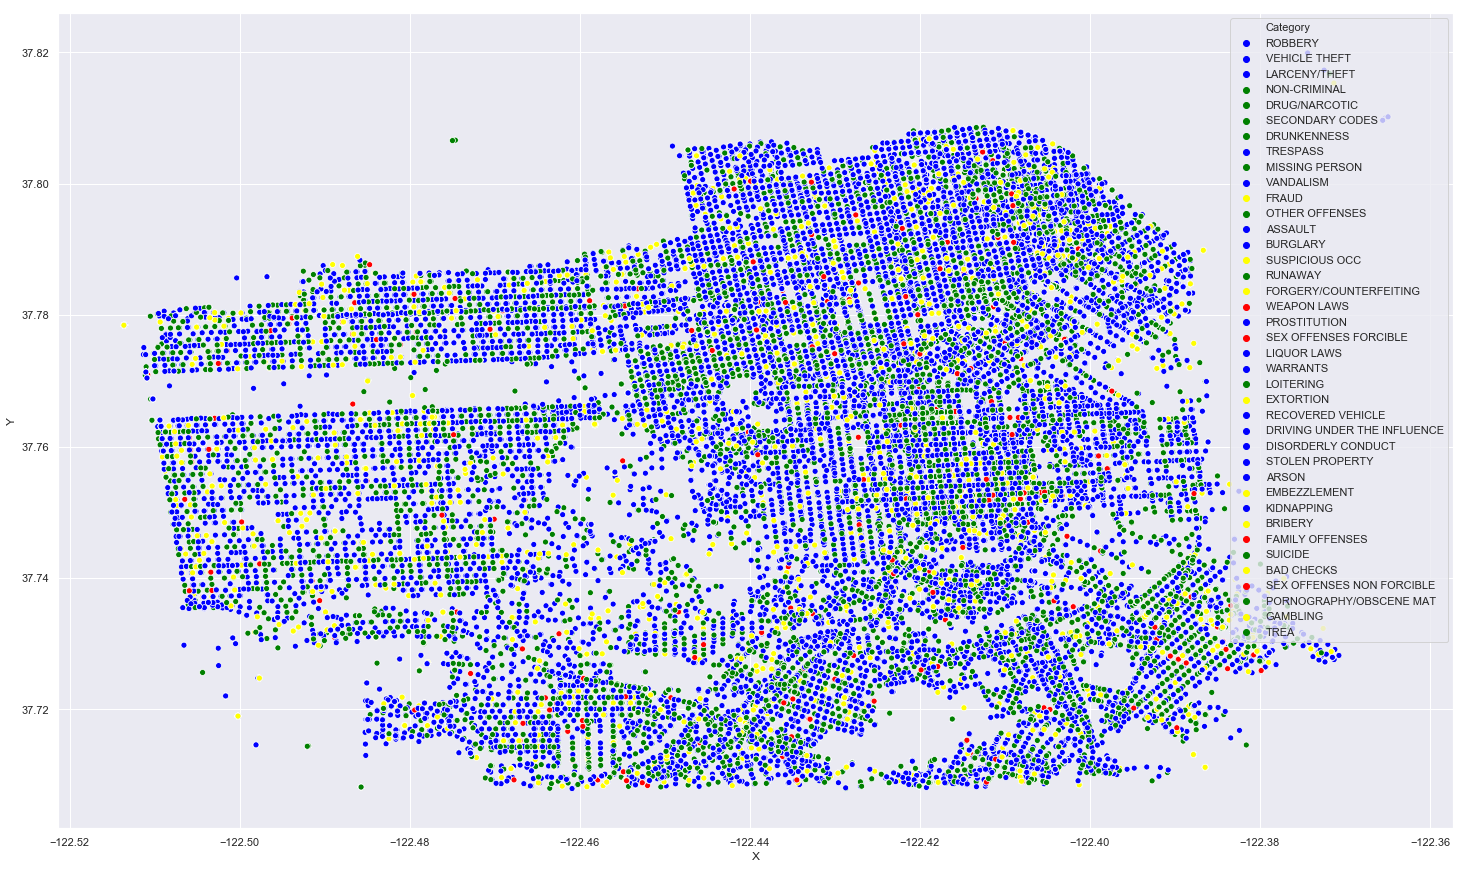

In [93]:
import seaborn as sns
xs = mapping['X'].values
ys = mapping['Y'].values
color_dict = dict({'WARRANTS': 'blue',
'OTHER OFFENSES': 'green',
'LARCENY/THEFT': 'blue',
'VEHICLE THEFT': 'blue',
'VANDALISM': 'blue', 
'NON-CRIMINAL': 'green',
'ROBBERY': 'blue', 
'ASSAULT': 'blue',
'WEAPON LAWS': 'red',
'BURGLARY': 'blue', 
'SUSPICIOUS OCC': 'yellow',
'DRUNKENNESS': 'green', 
'FORGERY/COUNTERFEITING': 'yellow',
'DRUG/NARCOTIC': 'green',
'STOLEN PROPERTY': 'blue',
'SECONDARY CODES': 'green', 
'TRESPASS': 'blue',
'MISSING PERSON': 'green',
'FRAUD': 'yellow',
'KIDNAPPING': 'blue',
'RUNAWAY': 'green',
'DRIVING UNDER THE INFLUENCE': 'blue',
'SEX OFFENSES FORCIBLE': 'red', 
'PROSTITUTION': 'blue',
'DISORDERLY CONDUCT': 'blue',
'ARSON': 'blue',
'FAMILY OFFENSES': 'red',
'LIQUOR LAWS': 'blue',
'BRIBERY': 'yellow', 
'EMBEZZLEMENT': 'yellow',
'SUICIDE': 'green',
'LOITERING': 'green',
'SEX OFFENSES NON FORCIBLE': 'red',
'EXTORTION': 'yellow',
'GAMBLING': 'yellow',
'BAD CHECKS': 'yellow',
'TREA': 'green',
'RECOVERED VEHICLE': 'blue',
'PORNOGRAPHY/OBSCENE MAT': 'green'})
sns.scatterplot(x="X", y="Y", hue="Category",
              data=mapping, palette=color_dict, 
                   legend='full')
sns.set(rc ={'figure.figsize':(35,25)})
plt.show()



In [6]:
import seaborn as sns
train['id'] = range(1, len(train) + 1)
train.groupby('Category').count()['id'].sort_values(ascending=False)

Category
LARCENY/THEFT                  22007
OTHER OFFENSES                 15715
NON-CRIMINAL                   11456
ASSAULT                         9594
VEHICLE THEFT                   6684
DRUG/NARCOTIC                   6683
VANDALISM                       5609
WARRANTS                        5358
BURGLARY                        4657
SUSPICIOUS OCC                  3848
MISSING PERSON                  3259
ROBBERY                         2898
FRAUD                           2109
FORGERY/COUNTERFEITING          1293
SECONDARY CODES                 1217
WEAPON LAWS                     1109
PROSTITUTION                     940
TRESPASS                         908
STOLEN PROPERTY                  572
DRUNKENNESS                      570
SEX OFFENSES FORCIBLE            520
DISORDERLY CONDUCT               520
RECOVERED VEHICLE                391
KIDNAPPING                       307
DRIVING UNDER THE INFLUENCE      268
LIQUOR LAWS                      257
RUNAWAY                      

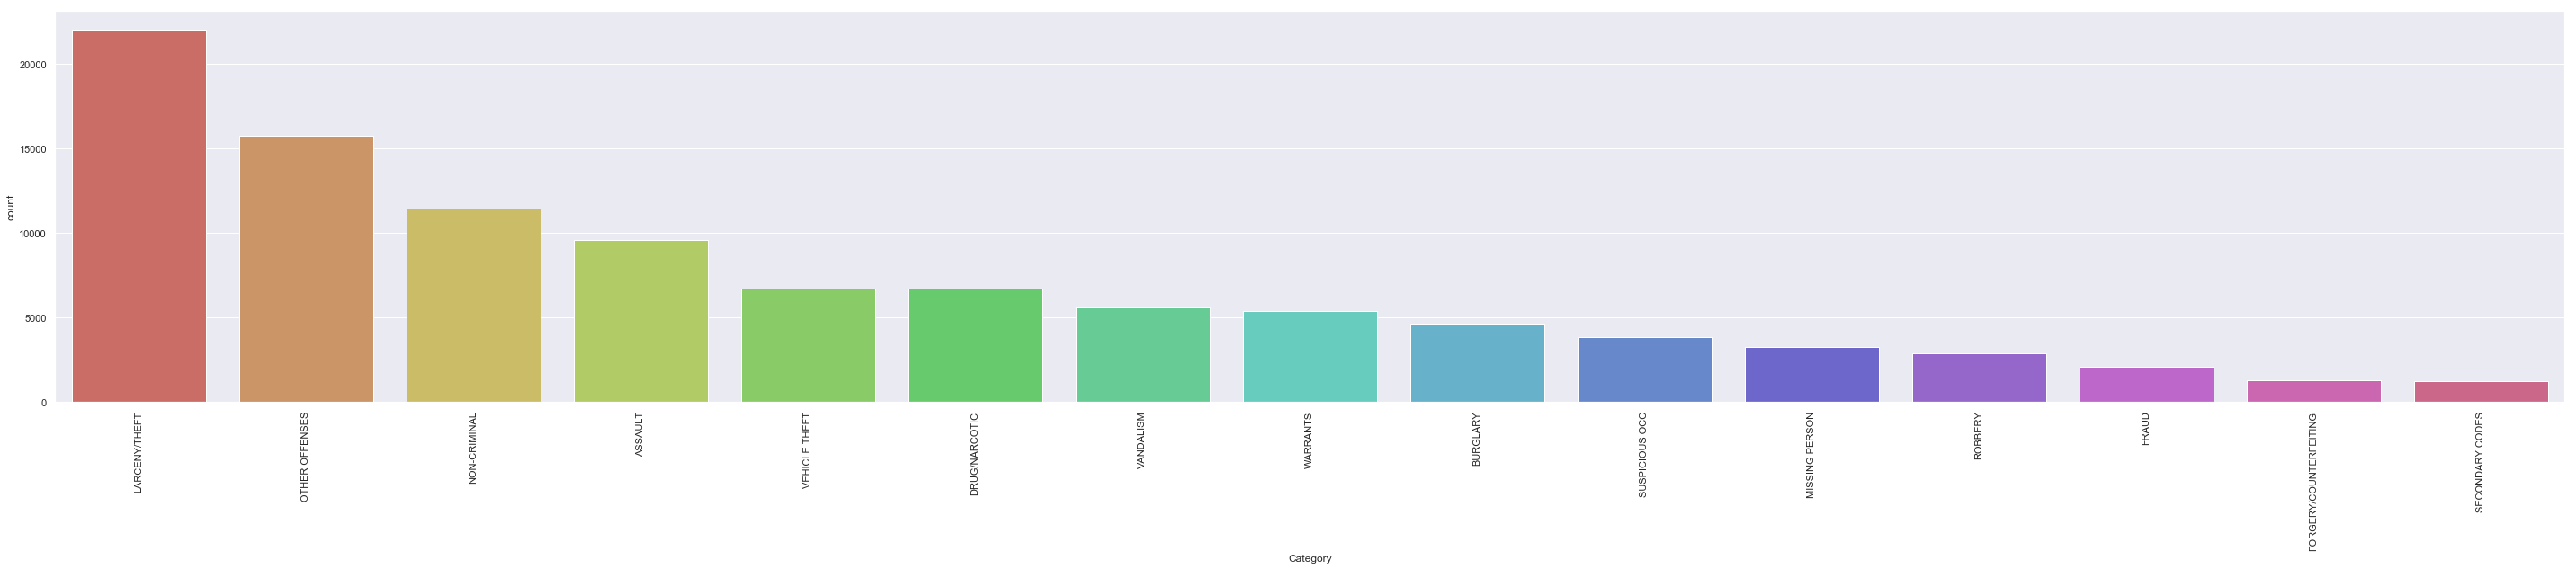

In [44]:
sns.countplot(x= 'Category', data = train, palette = 'hls', order=pd.value_counts(train['Category']).iloc[:15].index)
sns.set(rc ={'figure.figsize':(50,8)})
plt.tick_params(axis='x', labelrotation=90)
plt.show()

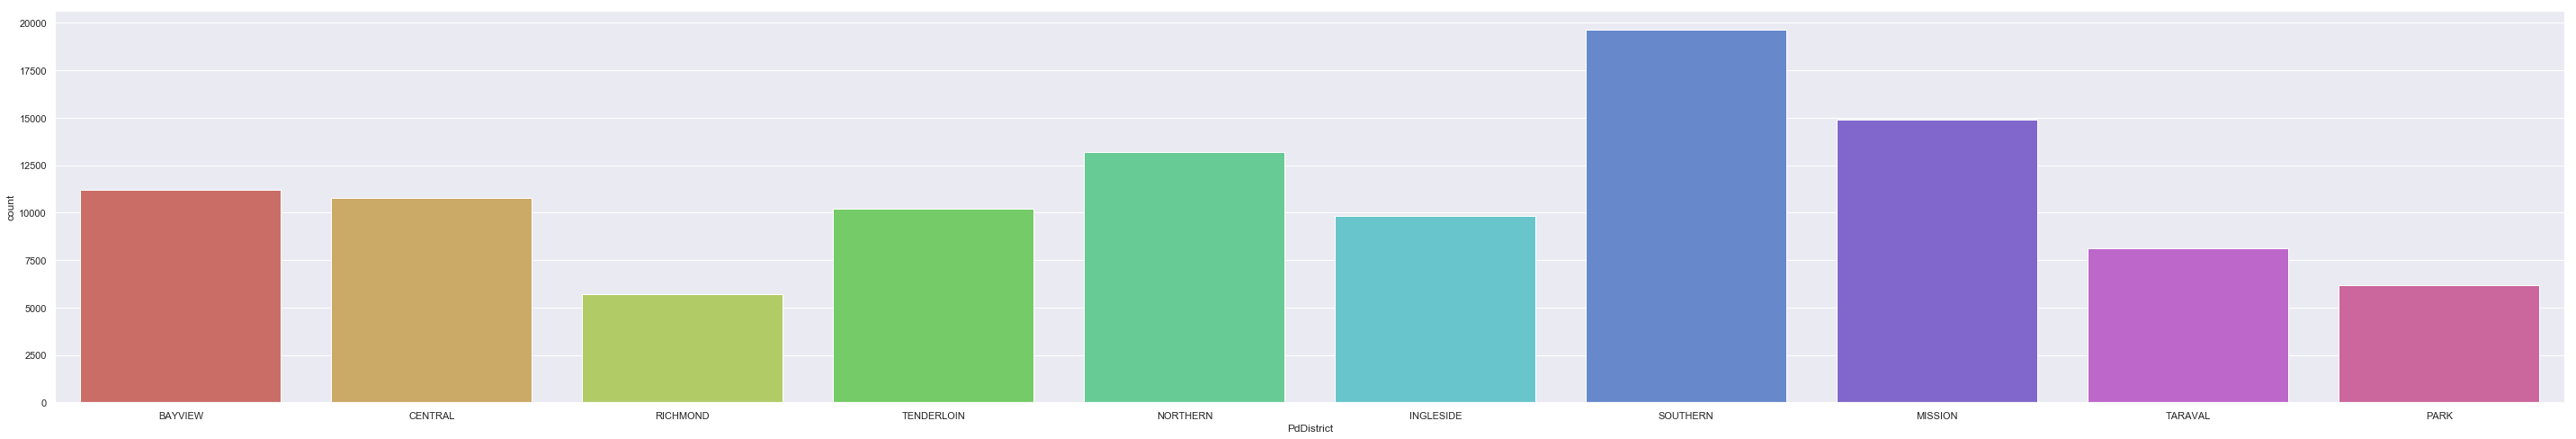

In [8]:
sns.countplot(x= 'PdDistrict', data = train, palette = 'hls')
sns.set(rc ={'figure.figsize':(15,7)})
plt.show()

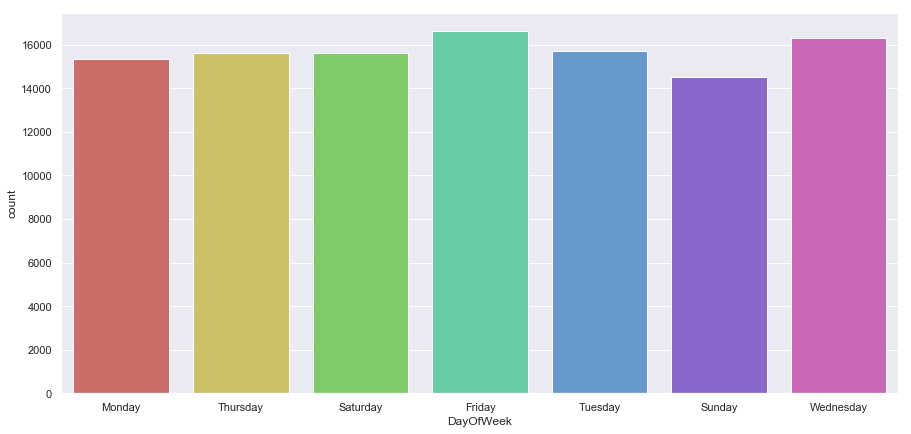

In [9]:
sns.countplot(x= 'DayOfWeek', data = train, palette = 'hls')
sns.set(rc ={'figure.figsize':(10,7)})
plt.show()

In [10]:
train['Dates'] = pd.to_datetime(train.Dates) 
train['year'] = train['Dates'].dt.year 
train['month'] = train['Dates'].dt.month 
train['day'] = train['Dates'].dt.day 
train['hour'] = train['Dates'].dt.hour 
train['minute'] = train['Dates'].dt.minute
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,id,year,month,day,hour,minute
160326,2013-04-01 20:31:00,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Monday,BAYVIEW,"ARREST, BOOKED",0 Block of NICHOLS WY,-122.387244,37.719513,1,2013,4,1,20,31
625530,2006-06-29 17:12:00,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Thursday,CENTRAL,"ARREST, CITED",2800 Block of TAYLOR ST,-122.415923,37.808591,2,2006,6,29,17,12
295266,2011-04-23 22:40:00,LIQUOR LAWS,POSSESSION OF ALCOHOL BY MINOR,Saturday,RICHMOND,"ARREST, CITED",200 Block of 9TH AV,-122.467764,37.783714,3,2011,4,23,22,40
729055,2005-01-13 22:00:00,BURGLARY,"BURGLARY,STORE UNDER CONSTRUCTION, UNLAWFUL ENTRY",Thursday,RICHMOND,NONE,100 Block of CLEMENT ST,-122.460679,37.783057,4,2005,1,13,22,0
293420,2011-05-06 08:45:00,NON-CRIMINAL,LOST PROPERTY,Friday,TENDERLOIN,LOCATED,100 Block of TURK ST,-122.411593,37.783053,5,2011,5,6,8,45
216662,2012-06-26 15:05:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Tuesday,NORTHERN,NONE,1100 Block of FILLMORE ST,-122.431980,37.780048,6,2012,6,26,15,5
272194,2011-09-05 12:00:00,ASSAULT,BATTERY,Monday,TENDERLOIN,NONE,200 Block of OFARRELL ST,-122.409541,37.786276,7,2011,9,5,12,0
516390,2008-02-05 07:47:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Tuesday,BAYVIEW,"ARREST, BOOKED",1600 Block of DAVIDSON AV,-122.392447,37.746275,8,2008,2,5,7,47
267266,2011-09-25 12:10:00,MISSING PERSON,MISSING ADULT,Sunday,CENTRAL,NONE,900 Block of HYDE ST,-122.417044,37.789595,9,2011,9,25,12,10
628984,2006-06-14 01:20:00,ASSAULT,BATTERY,Wednesday,NORTHERN,NONE,FRANKLIN ST / FILBERT ST,-122.425815,37.799275,10,2006,6,14,1,20


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
dow_matrix = count_vect.fit_transform(train['DayOfWeek'])
dist_matrix = count_vect.fit_transform(train['PdDistrict'])

In [12]:
dow_matrix = dow_matrix.todense()
dist_matrix = dist_matrix.todense()

In [13]:
X = train[['X','Y', 'year', 'month', 'day','hour', 'minute']]
X = X.values
Y = np.array(train['Category'])
Y = Y.reshape(Y.shape[0],1)
print(X)
print(Y)

[[-1.22387244e+02  3.77195130e+01  2.01300000e+03 ...  1.00000000e+00
   2.00000000e+01  3.10000000e+01]
 [-1.22415923e+02  3.78085905e+01  2.00600000e+03 ...  2.90000000e+01
   1.70000000e+01  1.20000000e+01]
 [-1.22467764e+02  3.77837144e+01  2.01100000e+03 ...  2.30000000e+01
   2.20000000e+01  4.00000000e+01]
 ...
 [-1.22406521e+02  3.77850629e+01  2.01500000e+03 ...  3.00000000e+00
   1.60000000e+01  2.00000000e+00]
 [-1.22412570e+02  3.77704816e+01  2.00300000e+03 ...  3.00000000e+00
   1.40000000e+01  0.00000000e+00]
 [-1.22497501e+02  3.77551218e+01  2.01000000e+03 ...  9.00000000e+00
   1.40000000e+01  0.00000000e+00]]
[['ASSAULT']
 ['LARCENY/THEFT']
 ['LIQUOR LAWS']
 ...
 ['LARCENY/THEFT']
 ['VEHICLE THEFT']
 ['VANDALISM']]


In [14]:
X = np.hstack((X,dow_matrix))

In [15]:
X = np.hstack((X,dist_matrix))

In [16]:
from sklearn.model_selection import train_test_split

In [17]:

from sklearn.linear_model import LogisticRegression


In [ ]:
lr_ridge = LogisticRegression(penalty='l2')
lr_ridge.fit(X=X, y=Y)
lr_ridge.score(X=X, y=Y)

/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
logReg_ridge = cross_val_score(lr_ridge, X, Y, cv=10, scoring='accuracy')
print(logReg_ridge)

/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[0.23383356 0.23319079 0.23471059 0.23954823 0.23647295 0.23184179
 0.23199635 0.2344035  0.23802573 0.22713999]


In [20]:

lr_lasso = LogisticRegression(penalty='l1')
lr_lasso.fit(X=X, y=Y)
lr_lasso.score(X=X, y=Y)

/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.23378007780824914

In [21]:
logReg_lasso = cross_val_score(lr_lasso, X, Y, cv=10, scoring='accuracy')
print(logReg_lasso)

/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/macfan/anaconda2/li

[0.23146885 0.23346374 0.23416454 0.23745332 0.23437785 0.231295
 0.22962625 0.23285297 0.23975915 0.22942143]


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


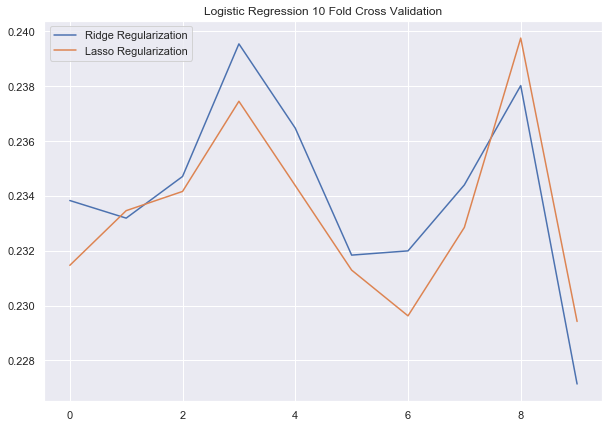

In [22]:
x_list = range(10)
plt.plot(x_list, logReg_ridge, label='Ridge Regularization')
plt.plot(x_list, logReg_lasso, label='Lasso Regularization')
plt.legend()
plt.title('Logistic Regression 10 Fold Cross Validation')
plt.show()

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
precsion = []
recall = []
f1Score = []

In [26]:
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    max_iters = (i*250)+1000
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=max_iters)
    mlp.fit(x_train,y_train)
    values = mlp.predict(x_test)
    pres_score = precision_score(y_test,values,average='micro')
    rec_score = recall_score(y_test,values,average='micro')
    f_scr = f1_score(y_test,values,average='micro')
    print(pres_score)
    precsion.append(pres_score)
    print(rec_score)
    recall.append(rec_score)
    print(f_scr)
    f1Score.append(f_scr)

/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.23465743440233236
0.23465743440233236
0.23465743440233233


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.22722303206997085
0.22722303206997085
0.22722303206997088


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2278061224489796
0.2278061224489796
0.2278061224489796


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.22175655976676384
0.22175655976676384
0.22175655976676384


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.21785714285714286
0.21785714285714286
0.21785714285714286


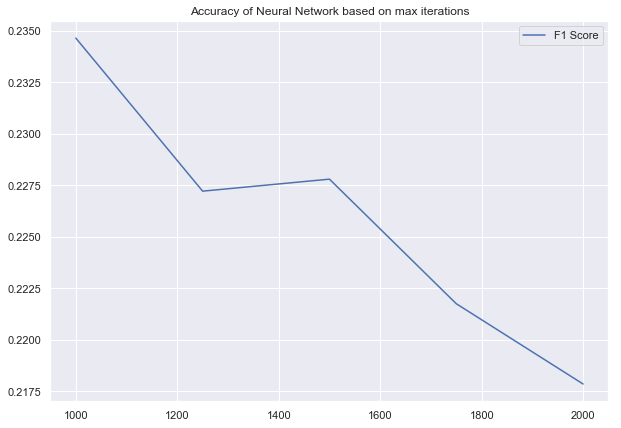

In [32]:
x_list = [1000,1250,1500,1750,2000]
plt.plot(x_list, f1Score, label='F1 Score')
plt.legend()
plt.title('Accuracy of Neural Network based on max iterations')
plt.show()

In [39]:
activations = ['identity','logistic','tanh', 'relu']

In [40]:
for function in activations:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, activation=function)
    mlp.fit(x_train,y_train)
    values = mlp.predict(x_test)
    pres_score = precision_score(y_test,values,average='micro')
    rec_score = recall_score(y_test,values,average='micro')
    f_scr = f1_score(y_test,values,average='micro')
    print(pres_score)
    precsion.append(pres_score)
    print(rec_score)
    recall.append(rec_score)
    print(f_scr)
    f1Score.append(f_scr)

/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.22926384839650146
0.22926384839650146
0.22926384839650146


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.20215014577259474
0.20215014577259474
0.20215014577259474


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.20051020408163264
0.20051020408163264
0.20051020408163264


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.23075801749271138
0.23075801749271138
0.23075801749271138


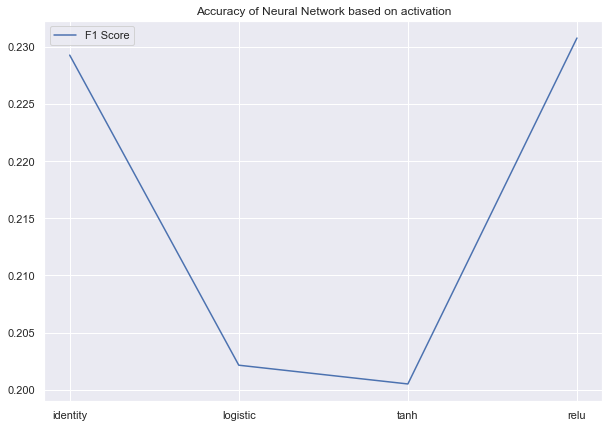

In [42]:

plt.plot(activations, f1Score, label='F1 Score')
plt.legend()
plt.title('Accuracy of Neural Network based on activation')
plt.show()

In [38]:
recall = []
precsion = []
f1Score = []
layers = [50]
for layer in layers:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    mlp = MLPClassifier(hidden_layer_sizes=(layer, layer), max_iter=1000, alpha=0.0001, activation='relu')
    mlp.fit(x_train,y_train)
    values = mlp.predict(x_test)
    pres_score = precision_score(y_test,values,average='micro')
    rec_score = recall_score(y_test,values,average='micro')
    f_scr = f1_score(y_test,values,average='micro')
    print(pres_score)
    precsion.append(pres_score)
    print(rec_score)
    recall.append(rec_score)
    print(f_scr)
    f1Score.append(f_scr)

/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.20579446064139942
0.20579446064139942
0.20579446064139942


In [45]:
precsion = []
recall = []
f1Score = []
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    alp = .0001*(i+1)
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, alpha=alp)
    mlp.fit(x_train,y_train)
    values = mlp.predict(x_test)
    pres_score = precision_score(y_test,values,average='micro')
    rec_score = recall_score(y_test,values,average='micro')
    f_scr = f1_score(y_test,values,average='micro')
    print(pres_score)
    precsion.append(pres_score)
    print(rec_score)
    recall.append(rec_score)
    print(f_scr)
    f1Score.append(f_scr)

/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.23323615160349853
0.23323615160349853
0.23323615160349853


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2309402332361516
0.2309402332361516
0.2309402332361516


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.22379737609329445
0.22379737609329445
0.22379737609329442


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2209183673469388
0.2209183673469388
0.2209183673469388


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.21362973760932943
0.21362973760932943
0.21362973760932943


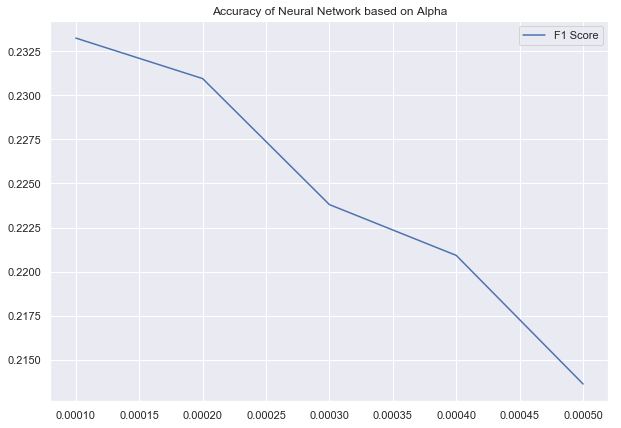

In [48]:
alps = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
plt.plot(alps, f1Score, label='F1 Score')
plt.legend()
plt.title('Accuracy of Neural Network based on Alpha')
plt.show()

In [49]:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10,10), max_iter=1000)
    mlp.fit(x_train,y_train)
    values = mlp.predict(x_test)
    pres_score = precision_score(y_test,values,average='micro')
    rec_score = recall_score(y_test,values,average='micro')
    f_scr = f1_score(y_test,values,average='micro')
    print(pres_score)
    precsion.append(pres_score)
    print(rec_score)
    recall.append(rec_score)
    print(f_scr)
    f1Score.append(f_scr)

/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.21731049562682217
0.21731049562682217
0.21731049562682217


In [51]:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000)
    mlp.fit(x_train,y_train)
    values = mlp.predict(x_test)
    pres_score = precision_score(y_test,values,average='micro')
    rec_score = recall_score(y_test,values,average='micro')
    f_scr = f1_score(y_test,values,average='micro')
    print(pres_score)
    precsion.append(pres_score)
    print(rec_score)
    recall.append(rec_score)
    print(f_scr)
    f1Score.append(f_scr)

/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.24347667638483966
0.24347667638483966
0.24347667638483966


In [20]:
kernels = ['rbf', 'linear','sigmoid']
from sklearn import svm
precsion = []
recall = []
f1Score = []

In [21]:
print(Y.shape)
temp_x, temp_xx, temp_y, temp_yy = train_test_split(X, Y, test_size = 0.5)
print(temp_y.shape)

(109757, 1)
(54878, 1)


In [22]:
for kern in kernels:
    x_train, x_test, y_train, y_test = train_test_split(temp_x, temp_y, test_size = 0.25)
    print(kern)
    clf = svm.SVC(kernel = kern)
    clf.fit(x_train, y_train)  
    values = clf.predict(x_test)
    f_scr = f1_score(y_test,values,average='micro')
    print(f_scr)
    f1Score.append(f_scr)

rbf


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.23265306122448978
linear


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.22813411078717202
sigmoid


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1977405247813411


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(temp_x, temp_y, test_size = 0.25)
clf = svm.SVC(kernel = 'poly', C=0.001)
clf.fit(x_train, y_train)  
values = clf.predict(x_test)
f_scr = f1_score(y_test,values,average='micro')
print(f_scr)
f1Score.append(f_scr)

/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


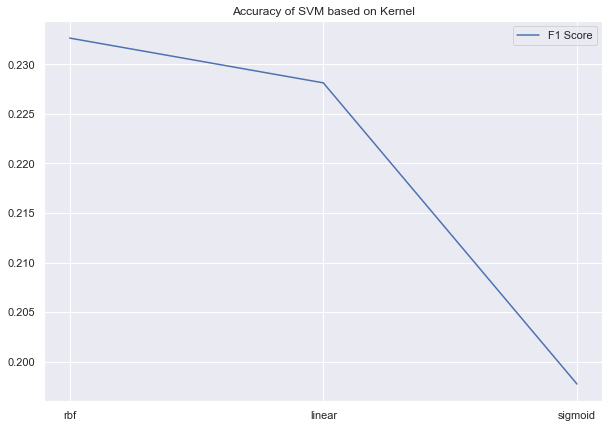

In [23]:
#plt.plot(kernels, precsion, label='Precision')
#plt.plot(kernels, recall, label='Recall')
plt.plot(kernels, f1Score, label='F1 Score')
plt.legend()
plt.title('Accuracy of SVM based on Kernel')
plt.show()

In [25]:
f1Score = []
cVals = [0.001, 0.01, 0.1]
for c in cVals:
    x_train, x_test, y_train, y_test = train_test_split(temp_x, temp_y, test_size = 0.25)
    clf = svm.SVC(kernel = 'rbf', C = c)
    clf.fit(x_train, y_train)  
    values = clf.predict(x_test)
    f_scr = f1_score(y_test,values,average='micro')
    print(f_scr)
    f1Score.append(f_scr)

/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.20473760932944607


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1986880466472303


/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.23739067055393587


In [27]:
x_train, x_test, y_train, y_test = train_test_split(temp_x, temp_y, test_size = 0.25)
clf = svm.SVC(kernel = 'rbf', C = 5)
clf.fit(x_train, y_train)  
values = clf.predict(x_test)
f_scr = f1_score(y_test,values,average='micro')
print(f_scr)
f1Score.append(f_scr)

/Users/macfan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.20357142857142857


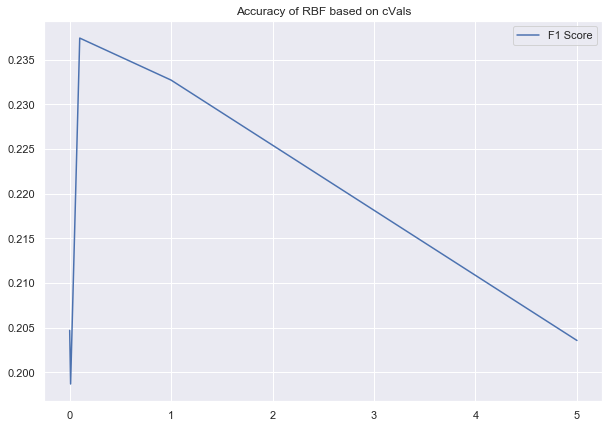

In [34]:
cVals = [0.001, 0.01, 0.1, 1, 5]
plt.plot(cVals, f1Score, label='F1 Score')
plt.legend()
plt.title('Accuracy of RBF based on cVals')
plt.show()

In [33]:
print(f1Score)
f1Score = [0.2047, 0.1987, 0.2374, 0.2327, 0.20357]

[0.2047, 0.1987, 0.2374, 0.2327, 0.20357]


In [31]:
precsion = []
recall = []
f1Score = []

In [ ]:
for i in range(5):
    deg = i+2
    clf = svm.SVC(kernel = 'poly', degree = deg)
    clf.fit(x_train, y_train)  
    values = clf.predict(x_test)
    pres_score = precision_score(y_test,values,average='micro')
    rec_score = recall_score(y_test,values,average='micro')
    f_scr = f1_score(y_test,values,average='micro')

In [ ]:
x_list = [2,3,4,5,6]
plt.plot(x_list, precsion, label='Precision')
plt.plot(x_list, recall, label='Recall')
plt.plot(x_list, f1Score, label='F1 Score')
plt.legend()
plt.title('Accuracy of SVM with Polynomial Kernel based on Degree')
plt.show()

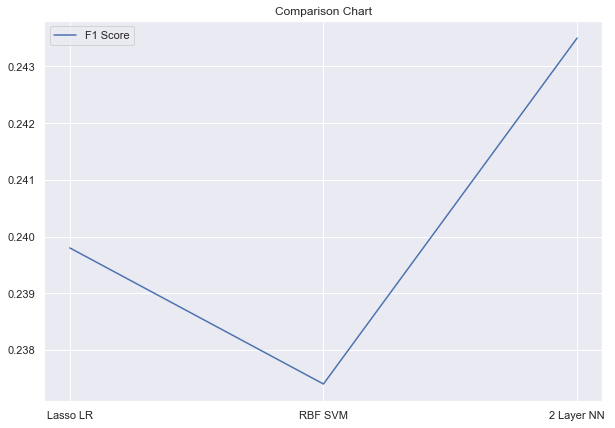

In [42]:
scores = [0.2398, 0.2374, 0.2435]
labels = ['Lasso LR', 'RBF SVM', '2 Layer NN']
plt.plot(labels, scores, label='F1 Score')
plt.legend()
plt.title('Comparison Chart')
plt.show()